In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np


### Cargo la el dataset principal: ACLED   
Cada linea es un evento de conflicto.  

In [4]:
df = pd.read_csv('ACLED Data.csv', sep=';')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2708208 entries, 0 to 2708207
Data columns (total 32 columns):
 #   Column              Dtype  
---  ------              -----  
 0   event_id_cnty       object 
 1   event_date          object 
 2   year                int64  
 3   time_precision      int64  
 4   disorder_type       object 
 5   event_type          object 
 6   sub_event_type      object 
 7   actor1              object 
 8   assoc_actor_1       object 
 9   inter1              object 
 10  actor2              object 
 11  assoc_actor_2       object 
 12  inter2              object 
 13  interaction         object 
 14  civilian_targeting  object 
 15  iso                 int64  
 16  region              object 
 17  country             object 
 18  admin1              object 
 19  admin2              object 
 20  admin3              object 
 21  location            object 
 22  latitude            float64
 23  longitude           float64
 24  geo_precision       int6

In [5]:
display(df.columns)

print('Event type: ',df['event_type'].unique())

print('Sub Event Type: ',df['sub_event_type'].unique())

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'iso', 'region', 'country',
       'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude',
       'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
       'tags', 'timestamp', 'population_1km'],
      dtype='object')

Event type:  ['Violence against civilians' 'Battles' 'Strategic developments'
 'Protests' 'Explosions/Remote violence' 'Riots']
Sub Event Type:  ['Attack' 'Armed clash' 'Arrests' 'Protest with intervention'
 'Abduction/forced disappearance' 'Suicide bomb'
 'Remote explosive/landmine/IED' 'Air/drone strike'
 'Disrupted weapons use' 'Peaceful protest' 'Sexual violence'
 'Mob violence' 'Shelling/artillery/missile attack'
 'Change to group/activity' 'Violent demonstration'
 'Looting/property destruction' 'Government regains territory'
 'Excessive force against protesters' 'Grenade'
 'Non-state actor overtakes territory' 'Non-violent transfer of territory'
 'Agreement' 'Headquarters or base established' 'Other' 'Chemical weapon']


### Cargo datos de PIB por años desde World Bank Data https://databank.worldbank.org/source/world-development-indicators?savedlg=1&l=en,en#
## GDP

In [6]:
wb_ind = pd.read_excel(
    'GDP.xlsx',
    na_values='..',
    skipfooter=5,
    engine='openpyxl'   
)

wb_ind.columns

wb_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series Name    266 non-null    object 
 1   Series Code    266 non-null    object 
 2   Country Name   266 non-null    object 
 3   Country Code   266 non-null    object 
 4   2015 [YR2015]  247 non-null    float64
 5   2016 [YR2016]  247 non-null    float64
 6   2017 [YR2017]  247 non-null    float64
 7   2018 [YR2018]  247 non-null    float64
 8   2019 [YR2019]  247 non-null    float64
 9   2020 [YR2020]  247 non-null    float64
 10  2021 [YR2021]  247 non-null    float64
 11  2022 [YR2022]  247 non-null    float64
 12  2023 [YR2023]  245 non-null    float64
 13  2024 [YR2024]  236 non-null    float64
dtypes: float64(10), object(4)
memory usage: 29.2+ KB


In [7]:
year_cols = wb_ind.columns[wb_ind.columns.str.match(r'^\d{4}')]
year_cols


Index(['2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]',
       '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]',
       '2023 [YR2023]', '2024 [YR2024]'],
      dtype='object')

In [8]:
wb_ind['gdp_pc_10y_avg'] = wb_ind[year_cols].mean(axis=1)


In [9]:
wb = wb_ind[['Country Code', 'gdp_pc_10y_avg']]


In [10]:
pip install -U kaleido


Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install xlrd


Note: you may need to restart the kernel to use updated packages.


## GINI

In [12]:
gini = pd.read_excel(
    'GINI.xls',
    skiprows=3,
    skipfooter=5,
    na_values='..',
    engine='xlrd'
)


In [13]:
year_cols = gini.columns[gini.columns.str.match(r'^\d{4}$')]
year_cols

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024'],
      dtype='object')

In [14]:
gini[year_cols] = gini[year_cols].apply(pd.to_numeric, errors='coerce')

In [15]:
gini['gini_avg'] = gini[year_cols].mean(axis=1)

gini.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    261 non-null    object 
 1   Country Code    261 non-null    object 
 2   Indicator Name  261 non-null    object 
 3   Indicator Code  261 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            1 non-null      float64
 8   1964            1 non-null      float64
 9   1965            1 non-null      float64
 10  1966            1 non-null      float64
 11  1967            1 non-null      float64
 12  1968            2 non-null      float64
 13  1969            2 non-null      float64
 14  1970            3 non-null      float64
 15  1971            3 non-null      float64
 16  1972            2 non-null      float64
 17  1973            3 non-null      flo

In [16]:
cont_df = df['iso'].nunique()
print(cont_df)
cont_wb = wb_ind['Country Code'].nunique()
print(cont_wb)

df[['iso']].head()


238
266


,iso
0,894
1,50
2,270
3,704
4,108


### Convierto el country code de pais en el estandard de WB iso3

In [17]:
pip install pycountry


Note: you may need to restart the kernel to use updated packages.


In [18]:
import pycountry

def iso_num_to_iso3(x):
    try:
        return pycountry.countries.get(numeric=str(int(x)).zfill(3)).alpha_3
    except:
        return None

df['iso3'] = df['iso'].apply(iso_num_to_iso3)


In [19]:
df[df['iso3'].isna()]['iso'].unique()


array([0, 2], dtype=int64)

In [20]:
pd.set_option('display.max_columns', None)


In [21]:
df[df['iso'].isin([0,2])]


,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,civilian_targeting,iso,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,population_1km,iso3
226594,XKX1,2018-01-05,2018,1,Demonstrations,Riots,Violent demonstration,Rioters (Kosovo),NaN,Rioters,Civilians (Kosovo),Refugees/IDPs (Kosovo); Serbian Ethnic Group (...,Civilians,Rioters-Civilians,NaN,0,Europe,Kosovo,Gjakova,Gjakova,NaN,Gjakova,42.3803,20.4308,1,Local Source; Vecernje Novosti,International,"On 5 January 2018, a group of Kosovo Albanians...",0,NaN,1649355992,7380.0,None
227146,XKX2,2018-01-06,2018,1,Demonstrations,Protests,Peaceful protest,Protesters (Kosovo),Albanian Ethnic Group (Kosovo),Protesters,NaN,NaN,NaN,Protesters only,NaN,0,Europe,Kosovo,Gjakova,Gjakova,NaN,Gjakova,42.3803,20.4308,1,Tanjug,International,"On 6 January 2018, 2019 in Gjakova, Kosovo, re...",0,NaN,1652375202,7380.0,None
227989,XKX4,2018-01-08,2018,1,Strategic developments,Strategic developments,Looting/property destruction,Unidentified Armed Group (Kosovo),NaN,Political militia,Civilians (Kosovo),Serbian Ethnic Group (Kosovo),Civilians,Political militia-Civilians,NaN,0,Europe,Kosovo,Peja,Kline,NaN,Rudice,42.6808,20.4894,1,Local Source; Vecernje Novosti,International,A store of hay property of a Serbian returnee ...,0,NaN,1618587220,281.0,None
228227,XKX3,2018-01-08,2018,2,Demonstrations,Protests,Peaceful protest,Protesters (Kosovo),Students (Kosovo),Protesters,NaN,NaN,NaN,Protesters only,NaN,0,Europe,Kosovo,Pristina,Pristina,NaN,Pristina,42.6666,21.1724,1,RTK,National,"As reported on January 8, 2018, students of a ...",0,NaN,1658253394,14761.0,None
228586,XKX5,2018-01-09,2018,1,Strategic developments,Strategic developments,Looting/property destruction,Unidentified Armed Group (Kosovo),NaN,Political militia,Civilians (Kosovo),Serbian Ethnic Group (Kosovo),Civilians,Political militia-Civilians,NaN,0,Europe,Kosovo,Peja,Istog,NaN,Llukac i Thate,42.7347,20.5094,1,Vecernje Novosti; Local Source,International,A store of hay property of a Serbian returnee ...,0,NaN,1618587220,260.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2689164,XKX1244,2025-12-12,2025,1,Demonstrations,Protests,Peaceful protest,Protesters (Kosovo),Labor Group (Kosovo),Protesters,NaN,NaN,NaN,Protesters only,NaN,0,Europe,Kosovo,Pristina,Pristina,NaN,Pristina,42.6666,21.1724,1,Kallxo,National,"On 12 December 2025, workers of the Kosovo Ene...",0,crowd size=no report,1768349905,14994.0,None
2690050,XKX1245,2025-12-13,2025,1,Strategic developments,Strategic developments,Looting/property destruction,Unidentified Armed Group (Kosovo),NaN,Political militia,Civilians (Kosovo),Serbian Ethnic Group (Kosovo),Civilians,Political militia-Civilians,NaN,0,Europe,Kosovo,Pristina,Obiliq,NaN,Obiliq,42.6870,21.0672,1,Danas,Regional,"Property destruction: On 13 December 2025, two...",0,NaN,1768349905,1123.0,None
2696904,XKX1246,2025-12-19,2025,1,Strategic developments,Strategic developments,Arrests,Police Forces of Kosovo (2020-),NaN,State forces,Civilians (Kosovo),NaN,Civilians,State forces-Civilians,NaN,0,Europe,Kosovo,Pristina,Pristina,NaN,Pristina,42.6666,21.1724,1,Danas,Regional,"On 19 December 2025, Kosovo police arrested se...",0,NaN,1768349905,14994.0,None
2701789,XKX1247,2025-12-24,2025,1,Demonstrations,Protests,Peaceful protest,Protesters (Kosovo),Labor Group (Kosovo),Protesters,NaN,NaN,NaN,Protesters only,NaN,0,Europe,Kosovo,Pristina,Pristina,NaN,Pristina,42.6666,21.1724,1,Gazeta Express,National,"On 24 December 2025, workers of the Kosovo Ene...",0,crowd size=no report,1768349905,14994.0,None


In [22]:
df['iso3'] = df['iso'].apply(iso_num_to_iso3)


### Kosovo es un exepcion que tengo que corregir

In [23]:
df.loc[df['iso'] == 2, 'iso3'] = 'XKX'


In [24]:
df[df['iso'] == 2][['iso','iso3','country']].head()


,iso,iso3,country
322898,2,XKX,Akrotiri and Dhekelia
456664,2,XKX,Akrotiri and Dhekelia
685869,2,XKX,Akrotiri and Dhekelia
952391,2,XKX,Akrotiri and Dhekelia
955492,2,XKX,Akrotiri and Dhekelia


In [25]:
df.loc[df['iso']==0, ['country','admin1','location']]


,country,admin1,location
226594,Kosovo,Gjakova,Gjakova
227146,Kosovo,Gjakova,Gjakova
227989,Kosovo,Peja,Rudice
228227,Kosovo,Pristina,Pristina
228586,Kosovo,Peja,Llukac i Thate
...,...,...,...
2689164,Kosovo,Pristina,Pristina
2690050,Kosovo,Pristina,Obiliq
2696904,Kosovo,Pristina,Pristina
2701789,Kosovo,Pristina,Pristina


In [26]:
df.loc[df['iso'].isin([0,2]), ['iso','country']].drop_duplicates().sort_values('iso')


,iso,country
226594,0,Kosovo
322898,2,Akrotiri and Dhekelia


In [27]:
df.loc[df['iso'] == 2, 'iso3'] = 'XAD'

In [28]:
df['iso3'].isna().sum()


1238

In [29]:
df['iso3'] = df['iso'].apply(iso_num_to_iso3)


In [30]:
df.loc[df['iso'] == 2, 'iso3'] = 'XKX'


In [31]:
df['iso3'].isna().sum()


1238

In [32]:
df.loc[df['iso3'].isna(), 'iso'].value_counts().head(20)


iso
0    1238
Name: count, dtype: int64

In [33]:
df.loc[df['iso'] == 0, 
       ['country','admin1','admin2','location','latitude','longitude','event_date']
      ].head(20)

,country,admin1,admin2,location,latitude,longitude,event_date
226594,Kosovo,Gjakova,Gjakova,Gjakova,42.3803,20.4308,2018-01-05
227146,Kosovo,Gjakova,Gjakova,Gjakova,42.3803,20.4308,2018-01-06
227989,Kosovo,Peja,Kline,Rudice,42.6808,20.4894,2018-01-08
228227,Kosovo,Pristina,Pristina,Pristina,42.6666,21.1724,2018-01-08
228586,Kosovo,Peja,Istog,Llukac i Thate,42.7347,20.5094,2018-01-09
231101,Kosovo,Peja,Istog,Osojan,42.7175,20.5656,2018-01-13
231634,Kosovo,Peja,Istog,Istog,42.7822,20.4908,2018-01-14
233043,Kosovo,Mitrovica,North Mitrovica,North Mitrovica,42.8951,20.8653,2018-01-16
242417,Kosovo,Pristina,Pristina,Pristina,42.6666,21.1724,2018-01-31
242653,Kosovo,Mitrovica,North Mitrovica,North Mitrovica,42.8951,20.8653,2018-02-01


In [34]:
df['iso3'] = df['iso'].apply(iso_num_to_iso3)

# Kosovo
df.loc[df['iso'].isin([0,2]), 'iso3'] = 'XKX'


In [35]:
df['iso3'].isna().sum()


0

### finalmente hago el merge en un unico dataset

In [36]:
gini_clean = gini[['Country Code', 'gini_avg']].copy()


In [37]:
gini_clean = gini_clean.rename(columns={'Country Code':'iso3'})
wb = wb.rename(columns={'Country Code':'iso3'})

In [38]:
gini_clean['iso3'].is_unique


True

In [39]:
wb['iso3'].is_unique

True

In [40]:
df = df.merge(gini_clean, on='iso3', how='left')
df = df.merge(wb, on='iso3', how='left')

In [41]:
df

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,civilian_targeting,iso,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,population_1km,iso3,gini_avg,gdp_pc_10y_avg
0,ZAM871,2015-01-01,2015,3,Political violence,Violence against civilians,Attack,UPND: United Party for National Development,NaN,Political militia,Civilians (Zambia),PF: Patriotic Front,Civilians,Political militia-Civilians,Civilian targeting,894,Southern Africa,Zambia,Northern,Kasama,NaN,Kasama,-10.2166,31.2167,1,Zambia Reports,National,UPND member Geoffrey Bwalya Mwamba and his sup...,0,NaN,1552577394,4194.0,ZMB,NaN,3588.743430
1,BGD5,2015-01-01,2015,1,Political violence,Battles,Armed clash,AL: Bangladesh Awami League,NaN,Political militia,AL: Bangladesh Awami League,NaN,Political militia,Political militia-Political militia,NaN,50,South Asia,Bangladesh,Khulna,Jessore,Sharsha,Bagachra,22.9768,88.9615,1,United News of Bangladesh,National,One person was injured in a gunfight between t...,0,NaN,1553639131,2081.0,BGD,30.410000,6934.548742
2,GAM102,2015-01-01,2015,1,Strategic developments,Strategic developments,Arrests,Police Forces of Gambia (1996-2017),NaN,State forces,Civilians (Gambia),NaN,Civilians,State forces-Civilians,NaN,270,Western Africa,Gambia,Banjul,Banjul Central,NaN,Banjul,13.4531,-16.5775,1,AFP,International,Arrests: Dozens of military personnel and civi...,0,NaN,1618530319,30520.0,GMB,42.780000,2727.443776
3,VNM369,2015-01-01,2015,1,Demonstrations,Protests,Protest with intervention,Protesters (Vietnam),NaN,Protesters,Police Forces of Vietnam (1976-),NaN,State forces,State forces-Protesters,NaN,704,Southeast Asia,Vietnam,Ho Chi Minh,Tan Binh,NaN,Ho Chi Minh,10.8230,106.6300,1,US State Department,Other,People from Tien Giang Province tried to stage...,0,NaN,1618587205,56174.0,VNM,36.146154,11668.848168
4,BUR3027,2015-01-01,2015,1,Political violence,Battles,Armed clash,Unidentified Armed Group (Burundi),NaN,Political militia,Military Forces of Burundi (2005-),CNDD-FDD-Imbonerakure: National Council for th...,State forces,State forces-Political militia,NaN,108,Eastern Africa,Burundi,Cibitoke,Murwi,Murwi,Murwi,-2.8881,29.2047,1,RFI; IWACU; Radio Publique Africaine,National-International,Fighting between unidentified attackers believ...,21,NaN,1572403604,5528.0,BDI,36.980000,1031.846001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2708203,BRA107365,2025-12-31,2025,2,Political violence,Violence against civilians,Attack,Unidentified Gang and/or Police Militia,NaN,Political militia,Civilians (Brazil),NaN,Civilians,Political militia-Civilians,Civilian targeting,76,South America,Brazil,Bahia,Salvador,NaN,Salvador,-12.9711,-38.5108,1,Fogo Cruzado,Local partner-New media,"Around 31 December 2025 (as reported), in Salv...",1,NaN,1770078477,29872.0,BRA,56.166667,18232.829201
2708204,BRA107403,2025-12-31,2025,1,Political violence,Battles,Armed clash,Unidentified Gang and/or Police Militia,NaN,Political militia,Unidentified Gang (Brazil),NaN,Political militia,Political militia-Political militia,NaN,76,South America,Brazil,Pernambuco,Goiana,NaN,Goiana,-7.5629,-35.0128,1,Fogo Cruzado,Local partner-New media,"On 31 December 2025, in Goiana (Pernambuco), f...",1,NaN,1770078477,20659.0,BRA,56.166667,18232.829201
2708205,GBR9367,2025-12-31,2025,1,Political violence,Violence against civilians,Attack,Unidentified Armed Group (United Kingdom),NaN,Political militia,Civilians (Pakistan),NaN,Civilians,Political militia-Civilians,Civilian targeting,826,Europe,United Kingdom,England,Cambridgeshire,Cambridge,Cambridge,52.2034,0.1231,1,Guardian,National,"On 31 December 2025, two unidentified men targ...",0,NaN,1770149557,6576.0,GBR,32.533333,51275.005813
2708206,BFO15075,2025-12-31,2025,3,Strategic develop

In [42]:
check = df[['iso3','country']].drop_duplicates().sort_values('iso3')
check.head(50)


,iso3,country
263322,ABW,Aruba
110888,AFG,Afghanistan
1395,AGO,Angola
725594,AIA,Anguilla
230744,ALB,Albania
677022,AND,Andorra
150960,ARE,United Arab Emirates
224801,ARG,Argentina
224352,ARM,Armenia
1037672,ASM,American Samoa


In [43]:
df.loc[df['gdp_pc_10y_avg'].isna(), ['iso3','country']].drop_duplicates().sort_values('iso3')


,iso3,country
725594,AIA,Anguilla
1037672,ASM,American Samoa
1001573,ATA,Antarctica
224788,BES,Caribbean Netherlands
988333,BLM,Saint-Barthelemy
1214613,COK,Cook Islands
239948,CUB,Cuba
939795,CXR,Christmas Island
6929,ERI,Eritrea
734700,FLK,Falkland Islands


In [44]:
df.loc[df['country'] == 'Yemen']

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,civilian_targeting,iso,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,population_1km,iso3,gini_avg,gdp_pc_10y_avg
9,YEM32556,2015-01-01,2015,1,Political violence,Explosions/Remote violence,Remote explosive/landmine/IED,Unidentified Armed Group (Yemen),NaN,Political militia,Popular Resistance,NaN,Political militia,Political militia-Political militia,NaN,887,Middle East,Yemen,Abyan,Zingibar,NaN,Zinjibar,13.1287,45.3807,1,Huna Aden; Yemen Saeed; Yemen Data Project,Local partner-National,Member of the popular committees in Abyan repo...,0,NaN,1576530904,13391.0,YEM,NaN,NaN
42,YEM32558,2015-01-01,2015,1,Demonstrations,Riots,Violent demonstration,Rioters (Yemen),Southern Movement,Rioters,Police Forces of Yemen (2012-2022) Hadi,NaN,State forces,State forces-Rioters,NaN,887,Middle East,Yemen,Aden,Craiter,NaN,Aden - Kraytar,12.7775,45.0328,1,AFP; Yemen Data Project,Local partner-National,A protester was shot and wounded during clashe...,0,NaN,1690843540,18063.0,YEM,NaN,NaN
43,YEM32561,2015-01-01,2015,1,Political violence,Explosions/Remote violence,Remote explosive/landmine/IED,Unidentified Armed Group (Yemen),NaN,Political militia,Police Forces of Yemen (2012-2022) Hadi,NaN,State forces,State forces-Political militia,NaN,887,Middle East,Yemen,Hadramawt,Sayun,NaN,Sayun,15.9433,48.7933,1,Aden Post; Xinhua; Yemen Data Project,Local partner-National,Four police were killed and two others injured...,4,NaN,1690843540,24952.0,YEM,NaN,NaN
44,YEM32562,2015-01-01,2015,1,Political violence,Explosions/Remote violence,Remote explosive/landmine/IED,Unidentified Armed Group (Yemen),NaN,Political militia,Military Forces of Yemen (2012-2022) Hadi,NaN,State forces,State forces-Political militia,NaN,887,Middle East,Yemen,Hadramawt,Shibam,NaN,Shibam,15.9214,48.6362,1,Barakish; Hadarem; Yemen Data Project,Local partner-National,Three soldiers were reportedly injured in an I...,0,NaN,1690843540,2365.0,YEM,NaN,NaN
45,YEM32559,2015-01-01,2015,1,Political violence,Battles,Armed clash,AQAP: Al Qaeda in the Arabian Peninsula,Popular Resistance,Rebel group,Houthi Movement - Ansar Allah,NaN,Rebel group,Rebel group-Rebel group,NaN,887,Middle East,Yemen,Al Bayda,Wald Rabi,NaN,Al Qayfa,14.5322,44.8228,2,Barakish; Yemen Data Project,Local partner-National,Houthi forces clashed with armed tribesmen bac...,0,NaN,1695070249,46.0,YEM,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2708181,YEM112586,2025-12-31,2025,1,Political violence,Battles,Armed clash,Military Forces of Yemen (2017-) Houthi,NaN,State forces,West Coast Joint Forces,NaN,Political militia,State forces-Political militia,NaN,887,Middle East,Yemen,Al Hudaydah,Hays,NaN,Rub al Mahall,13.9296,43.4812,2,Undisclosed Source,Local partner-Other,"On 31 December 2025, Houthi forces exchanged m...",0,NaN,1769546486,24980.0,YEM,NaN,NaN
2708182,YEM112587,2025-12-31,2025,1,Political violence,Battles,Armed clash,Military Forces of Yemen (2017-) Houthi,NaN,State forces,Giants Brigades,NaN,Political militia,State forces-Political militia,NaN,887,Middle East,Yemen,Al Bayda,Nati,NaN,Nati,14.5924,45.6540,2,Undisclosed Source,Local partner-Other,"On 31 December 2025, Houthi forces clashed wit...",0,NaN,1769546486,1083.0,YEM,NaN,NaN
2708183,YEM112588,2025-12-31,2025,1,Political violence,Battles,Armed clash,Hadramawt Protection Forces,NaN,Political militia,Military Forces of Yemen (2022-2026) President...,NaN,State forces,State forces-Political militia,NaN,887,Middle East,Yemen,Hadramawt,Ghayl Bin Yamin,NaN,Al Ulayb,15.1475,49.0732,2,South24,National,"On 31 December 2025, armed tribesmen from the ...",0,NaN,1770676315,1887.0,YEM,NaN,NaN
2708184,YEM112589,2025-12-31,2025,2,Strategic developments,

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2708208 entries, 0 to 2708207
Data columns (total 35 columns):
 #   Column              Dtype  
---  ------              -----  
 0   event_id_cnty       object 
 1   event_date          object 
 2   year                int64  
 3   time_precision      int64  
 4   disorder_type       object 
 5   event_type          object 
 6   sub_event_type      object 
 7   actor1              object 
 8   assoc_actor_1       object 
 9   inter1              object 
 10  actor2              object 
 11  assoc_actor_2       object 
 12  inter2              object 
 13  interaction         object 
 14  civilian_targeting  object 
 15  iso                 int64  
 16  region              object 
 17  country             object 
 18  admin1              object 
 19  admin2              object 
 20  admin3              object 
 21  location            object 
 22  latitude            float64
 23  longitude           float64
 24  geo_precision       int6

### creo copias del df para las diferentes analysis:  
df_all = analisis de conflictos politicos  
df_model = analisis economicas (donde filtrere paises con indicadores economicos)


In [46]:
df_all = df.copy()
df_model = df.dropna(subset=['gdp_pc_10y_avg','gini_avg']).copy()


---


---


# INTRODUCTION
## Hay mas conflictos? 


## Q )Eventos y muertos por enfrentamiento bellico? 
Government regains territory  
Non-state actor overtakes territory  
Armed clash  

# BATTLE
## Filtro DF por 'BATTLES'  

ACLED defines a Battles event as a violent interaction between two organized armed groups at a particular time and location. Battles can occur between armed and organized state, non-state, and external groups, and in any combination thereof. There is no fatality minimum necessary for inclusion. Civilians can be harmed in the course of larger Battles events if they are caught in the crossfire, for example, or affected by strikes on military targets, which is commonly referred to as "collateral damage".

In [47]:
df_all['event_type'].unique()

btl = df_all.loc[df_all['event_type'] == 'Battles']

btl['fatalities'].isna().any()
(btl['fatalities'] == 0).any()  # Hay 0 en la columna. Enfrentamiento que no generan muertos.  


btl_cty_y = btl.groupby(['country','year']).size()
 
btl_y = btl.groupby('year').agg(
    events = ('year', 'size'),
    fatalities_tot = ('fatalities', 'sum')
).reset_index()

fig_1 = px.area(
    btl_y,
    x='year',
    y=['events', 'fatalities_tot'],
    markers=True,
    title="Conflict Events and Fatalities",
    template='plotly_dark'
)

fig_1.show()

## Export fig_1:

In [48]:
btl_y.to_csv("fig_1.csv", index=False)

## Q ) Eventos y muertos tambien con todo tipos de guerra? 
CONSIDERO  
'Armed clash'  
'Air/drone strike'  
'Shelling/artillery/missile attack'  
'Government regains territory'  
'Non-state actor overtakes territory'  

NO CONSIDERO:  
Chemical weapon    
Suicide bomb  
Remote explosive/landmine/IED (Improvised Explosive Device)  
Grenade  

In [49]:
all_w = [
    'Armed clash', 
    'Air/drone strike',
    'Shelling/artillery/missile attack',
    'Government regains territory',
    'Non-state actor overtakes territory'
]

all_war = df_all[df_all['sub_event_type'].isin(all_w)]

# --- 2. Aggregazione per anno + sub_event_type ---
all_w_y = (
    all_war.groupby(['year', 'sub_event_type'])
       .agg(fatalities=('fatalities', 'sum'))
       .reset_index()
)

# --- 3. Ordinamento opzionale delle categorie (dal meno al più letale) ---
order = (
    all_w_y.groupby("sub_event_type")["fatalities"]
           .sum()
           .sort_values()
           .index
)

all_w_y["sub_event_type"] = pd.Categorical(
    all_w_y["sub_event_type"],
    categories=order,
    ordered=True
)

# --- 4. Grafico Plotly: stacked area chart ---
fig = px.area(
    all_w_y.sort_values(["year", "sub_event_type"]),
    x='year',
    y='fatalities',
    color='sub_event_type',
    title="Fatalities by all types of modern conflicts",
    template='plotly_dark'
)

fig.update_layout(legend_title_text='Type of conflicts:')


fig.show()


Export fig_2:

In [50]:
fig_2 = (
    all_w_y
    .pivot(index='year', columns='sub_event_type', values='fatalities')
    .reset_index()
    .fillna(0)
)

fig_2.to_csv("fig_2.csv", index=False)


In [51]:
df_race = (
    all_war
    .groupby(['country', 'year'], as_index=False)['fatalities']
    .sum()
)

top_countries = (
    df_race.groupby('country')['fatalities']
           .sum()
           .nlargest(15)
           .index
)

df_race = df_race[df_race['country'].isin(top_countries)]

df_race = (
    df_race
    .pivot(index='country', columns='year', values='fatalities')
    .fillna(0)
    .sort_index(axis=1)
)

df_race = df_race.cumsum(axis=1)

Export fig_3: 

In [52]:
df_race.to_csv("fig_3.csv")

Hago un check par ver si es mejor mostrar Region/Fatalities per area or stacked 100%

In [53]:
rg_y = all_war.groupby(['region','year'], as_index=False)[['fatalities']].sum().sort_values(by='fatalities')

fig = px.bar(
    rg_y,
    x="year",
    y="fatalities",
    color="region",
    template='plotly_dark',
    color_discrete_sequence=px.colors.qualitative.Dark24
)

fig.show()


In [54]:
rg = all_war.loc[all_war['region'] == 'Caucasus and Central Asia']

rg['country'].value_counts()


country
Afghanistan     49805
Azerbaijan      17769
Armenia          4429
Kyrgyzstan         47
Tajikistan         29
Kazakhstan          8
Georgia             6
Turkmenistan        5
Uzbekistan          2
Name: count, dtype: int64

In [55]:
rg_pct = rg_y.copy()

rg_pct["fatalities_pct"] = (
    rg_pct["fatalities"] /
    rg_pct.groupby("year")["fatalities"].transform("sum")
) * 100

rg_stacked = (
    rg_pct
    .pivot(index='year', columns='region', values='fatalities_pct')
    .fillna(0)
    .reset_index()
)

rg_stacked.to_csv("fig_4.csv", index=False)

In [56]:
# rg_stacked.to_csv("fig_4.csv", index=False)

In [57]:
import kaleido

In [58]:
import sys
!{sys.executable} -m pip install -U kaleido


MAPA CON AREAS

In [59]:
map_points = (
    all_war
    .groupby('country', as_index=False)
    .agg({
        'latitude': 'mean',
        'longitude': 'mean',
        'fatalities': 'sum'
    })
)

map_points["size"] = map_points["fatalities"]

fig = px.scatter_geo(
    map_points,
    lat="latitude",
    lon="longitude",
    size="size",  
    hover_name="country",
    hover_data={"fatalities": True, "size": False},
    projection="natural earth",
)

fig.update_traces(
    marker=dict(
        color="#ff4d4d",
        line=dict(width=0.5, color="white"),
        opacity=0.75
    )
)

fig.update_layout(
    title="Total conflict fatalities by country",
    template="plotly_dark",
    margin=dict(l=0, r=0, t=40, b=0)
)

fig.show()

fig.write_image("world_map.png")



In [123]:
map_points = (
    all_war
    .groupby(['country', 'iso3'], as_index=False)
    .agg({
        'latitude': 'mean',
        'longitude': 'mean',
        'fatalities': 'sum'
    })
)

map_points.to_csv("flourish_map.csv", index=False)

In [60]:
iran = df_all.loc[df_all['country'] == 'Iran']

iran['fatalities'].sum()


4457

# TODO LO QUE NO ES GUERRA
Quito del df todo lo que he considerado guerra convencional anteriormente. 

In [61]:
no_battles = df_all[~df_all['sub_event_type'].isin(all_w)]

In [62]:
# SUNBURST — EVENTI (fig_3)

fig_3 = (
    no_battles
    .groupby(['event_type', 'sub_event_type', 'country'])
    .size()
    .reset_index(name='value')
    #.nlargest(20, 'value')
    .reset_index(drop=True)
)

fig_3.to_csv("fig_3.csv", index=False)


# SUNBURST — FATALITIES (fig_4)
fig_4 = (
    no_battles
    .groupby(['event_type', 'sub_event_type', 'country'])['fatalities']
    .sum()
    .reset_index(name='value')
    #.nlargest(20, 'value')
    .reset_index(drop=True)
)


#fig_4.to_csv("fig_4.csv", index=False)

In [63]:
fig = px.sunburst(
    fig_3,
    path=['event_type', 'sub_event_type', 'country'],
    values='value',
    title='By events num',
    template='plotly_dark'
)

fig.update_layout(
    width=600,
    height=600,
    margin=dict(t=40, l=10, r=10, b=10)
)

fig.update_traces(
    textinfo="label+percent parent"
)

fig.show()

In [64]:
fig = px.sunburst(
    fig_4,
    path=['event_type','sub_event_type','country'],
    values='value',
    color='event_type',
    title='by fatalities',
    template='plotly_dark',
)

# ingrandimento + leggibilità
fig.update_layout(
    width=600,
    height=600,
    margin=dict(t=40, l=10, r=10, b=10)
)

fig.update_traces(
    textinfo="label+percent parent"
)


fig.show()

TOP20

In [121]:
import plotly.express as px

# 1. Ordina per fatalities e prendi i top 20
top20 = fig_4.sort_values("value", ascending=False).head(20)

# 2. Crea la treemap
fig = px.treemap(
    top20,
    path=['event_type', 'sub_event_type', 'country'],
    values='value',
    color='event_type',
    title='Top 20 by fatalities out of battles',
    color_discrete_sequence=[
        "#6C757D",  # grigio caldo
        "#A3A9B1",  # grigio chiaro
        "#8F9AA3",  # blu-grigio tenue
        "#B8C2CC",  # grigio perla
        "#CED4DA"   # grigio molto chiaro
    ],
    template='simple_white'

)

# 3. Layout per leggibilità
fig.update_layout(
    width=600,
    height=600,
    margin=dict(t=40, l=10, r=10, b=10)
)


fig.show()

---

# TARGETING CIVILIANS
## Violence against civilians event type exclusively captures violence targeting civilians that does not occur concurrently with other forms of violence — such as rioting.   
# Q )Eventos contras Civiles por Paises?

In [65]:
df_ct = df.loc[df['civilian_targeting'] == 'Civilian targeting']

In [ ]:
events_cty_year = (
    df_ct.groupby(["country","year"]).size()     
      .unstack(fill_value=0)                   
      .stack()                                
      .reset_index(name="n_events")           
)

top = (
    events_cty_year.groupby('country')['n_events']
    .sum()
    .nlargest(10)
    .index
)

plot_df = events_cty_year[events_cty_year['country'].isin(top)]

fig = px.line(
    plot_df,
    x="year",
    y="n_events",
    color="country",
    markers=True,
    title="Events targeting Civilians (T10)",
    template='plotly_dark',
    color_discrete_sequence=px.colors.qualitative.T10
)

fig.show()





EXPORT FIG_5:

In [67]:
flourish_export = plot_df.pivot(index='year', columns='country', values='n_events').reset_index()
flourish_export.to_csv("fig_5.csv", index=False)

## Q) Muertos por evento contra civiles? 

In [68]:
fat_cty_year = (
    df_ct.groupby(["country", "year"])["fatalities"]
         .sum()                      
         .unstack(fill_value=0)
         .stack()
         .reset_index(name="fatalities")
)

top = (
    fat_cty_year.groupby('country')['fatalities']
                   .sum()
                   .nlargest(10)
                   .index
)

plot_df = fat_cty_year[fat_cty_year['country'].isin(top)]

fig = px.line(
    plot_df,
    x="year",
    y="fatalities",
    color="country",
    markers=True,
    title="Fatalities in events targeting civilians (Top 10)",
    template='plotly_dark',
    color_discrete_sequence=px.colors.qualitative.T10
)

fig.show()

Export fig_6:

In [69]:
exp_fig_6 = plot_df.pivot(index='year', columns='country', values='fatalities').reset_index()
exp_fig_6.to_csv("fig_6.csv", index=False)

In [70]:
print(len(df), "→", len(df_model))

2708208 → 2378628


In [71]:
print(df['country'].nunique(), "→", df_model['country'].nunique())

238 → 164


In [72]:
lost_countries = set(df['country'].unique()) - set(df_model['country'].unique())
lost_countries


{'Afghanistan',
 'Akrotiri and Dhekelia',
 'American Samoa',
 'Andorra',
 'Anguilla',
 'Antarctica',
 'Antigua and Barbuda',
 'Aruba',
 'Bahamas',
 'Bahrain',
 'Bailiwick of Guernsey',
 'Bailiwick of Jersey',
 'Bermuda',
 'British Indian Ocean Territory',
 'British Virgin Islands',
 'Brunei',
 'Cambodia',
 'Caribbean Netherlands',
 'Cayman Islands',
 'Christmas Island',
 'Cook Islands',
 'Cuba',
 'Curacao',
 'Dominica',
 'Eritrea',
 'Falkland Islands',
 'Faroe Islands',
 'French Guiana',
 'French Polynesia',
 'Gibraltar',
 'Greenland',
 'Guadeloupe',
 'Guam',
 'Isle of Man',
 'Kosovo',
 'Kuwait',
 'Libya',
 'Liechtenstein',
 'Martinique',
 'Mayotte',
 'Monaco',
 'Montserrat',
 'New Caledonia',
 'New Zealand',
 'Niue',
 'North Korea',
 'Northern Mariana Islands',
 'Oman',
 'Palau',
 'Puerto Rico',
 'Reunion',
 'Saint Helena, Ascension and Tristan da Cunha',
 'Saint Kitts and Nevis',
 'Saint Pierre and Miquelon',
 'Saint Vincent and the Grenadines',
 'Saint-Barthelemy',
 'Saint-Martin',


Importante mencionar que faltaran estos paises en el analisi de indicadores:  
    Afghanistan    
    Libya  
    Somalia  
    South Sudan  
    Yemen  

In [73]:
df_model.columns

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'iso', 'region', 'country',
       'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude',
       'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
       'tags', 'timestamp', 'population_1km', 'iso3', 'gini_avg',
       'gdp_pc_10y_avg'],
      dtype='object')

----


## Riots? event_type = 'Riots'
## Protests? event_type = 'Protests'

In [141]:
riots = no_battles[no_battles['event_type'] == 'Riots']
protests = no_battles[no_battles['event_type'] == 'Protests']

Q) Pais con mas disturbios por año? 

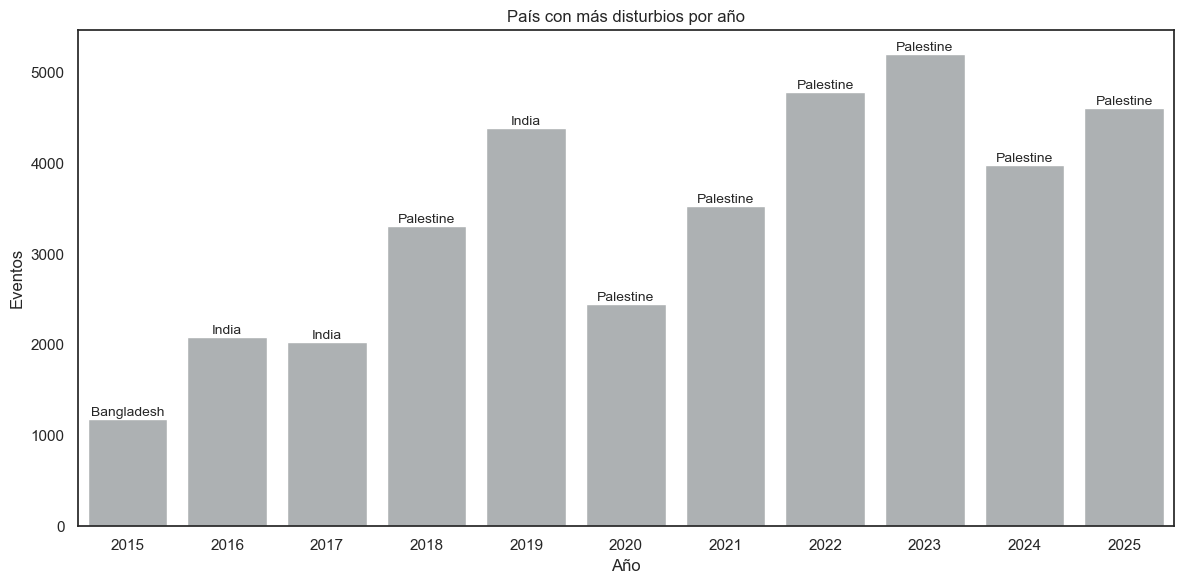

<Figure size 640x480 with 0 Axes>

In [192]:
df_counts = (
    riots
    .groupby(['year', 'country'])
    .size()
    .reset_index(name='events')
)

df_top1_events = (
    df_counts
    .sort_values(['year', 'events'], ascending=[True, False])
    .groupby('year')
    .head(1)
)

plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=df_top1_events,
    x="year",
    y="events",
    color="#ACB1B4"
)

for bar, (_, row) in zip(ax.patches, df_top1_events.iterrows()):
    ax.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        row['country'],
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title("País con más disturbios por año")
plt.xlabel("Año")
plt.ylabel("Eventos")
plt.tight_layout()
plt.show()

plt.savefig("top_riots_per_year.png", dpi=300, bbox_inches='tight')

Q) Pais con mas fatalities (riots) por cada año? 

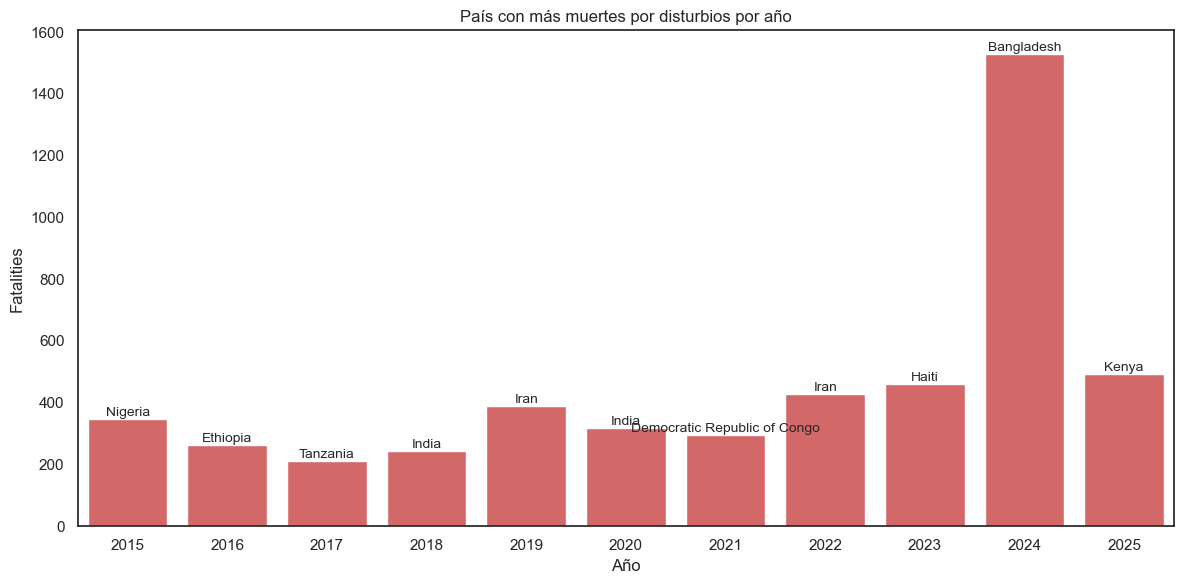

<Figure size 640x480 with 0 Axes>

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcolo fatalities per anno e paese
df_fatal = (
    riots
    .groupby(['year', 'country'])['fatalities']
    .sum()
    .reset_index()
)

# Seleziono il top‑1 per anno
df_top1_fatal = (
    df_fatal
    .sort_values(['year', 'fatalities'], ascending=[True, False])
    .groupby('year')
    .head(1)
)

# Grafico
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=df_top1_fatal,
    x="year",
    y="fatalities",
    color="#E45756"
)

# Etichette con il nome del paese
for bar, (_, row) in zip(ax.patches, df_top1_fatal.iterrows()):
    ax.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        row['country'],
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title("País con más muertes por disturbios por año")
plt.xlabel("Año")
plt.ylabel("Fatalities")
plt.tight_layout()
plt.show()

plt.savefig("top_riots_fatalities_per_year.png", dpi=300, bbox_inches='tight')

% eventi con 0 fatalities? 

In [178]:
riots['zero_fatalities'] = riots['fatalities'] == 0

df_country_stats = (
    riots
    .groupby('country')
    .agg(
        total_events=('fatalities', 'count'),
        pct_zero_fatalities=('zero_fatalities', 'mean')
    )
    .reset_index()
)

df_country_stats['pct_zero_fatalities'] *= 100

df_country_stats = df_country_stats.sort_values(
    'pct_zero_fatalities',
    ascending=False
)

df_country_stats.head()

,country,total_events,pct_zero_fatalities
115,Moldova,45,100.0
36,Christmas Island,1,100.0
184,Turks and Caicos Islands,1,100.0
173,Switzerland,50,100.0
172,Sweden,55,100.0


In [179]:
Paletine = df_country_stats[df_country_stats['country'] == 'Palestine']

Paletine

,country,total_events,pct_zero_fatalities
134,Palestine,31703,98.362931


In [195]:
countries = [
    "Bangladesh",
    "India",
    "Palestine",
    "Nigeria",
    "Ethiopia",
    "Tanzania",
    "Iran",
    "Democratic Republic of Congo",
    "Haiti",
    "Kenya"
]

df_selected = df_country_stats[df_country_stats["country"].isin(countries)]

df_selected = df_selected.sort_values("pct_zero_fatalities", ascending=True)


In [196]:
df_selected

,country,total_events,pct_zero_fatalities
45,Democratic Republic of Congo,2477,58.094469
57,Ethiopia,479,61.377871
177,Tanzania,294,65.646259
128,Nigeria,3152,67.829949
92,Kenya,4798,71.988328
82,Iran,1289,77.889837
14,Bangladesh,7770,80.398970
76,Haiti,1946,80.832477
80,India,24618,92.407994
134,Palestine,31703,98.362931


In [203]:
riots['actor2'].value_counts().head(20)

actor2
Civilians (India)                            8228
Military Forces of Israel (2022-)            7430
Military Forces of Israel (2009-2021)        6898
Police Forces of India (2014-)               6849
Civilians (Palestine)                        5436
Rioters (India)                              4949
Military Forces of Israel (2021-2022)        3870
Civilians (Israel)                           3450
Civilians (Bangladesh)                       2921
Civilians (Mexico)                           2812
Rioters (Bangladesh)                         2417
Civilians (Kenya)                            2206
Civilians (Brazil)                           1819
Police Forces of Chile (2018-2022)           1630
Civilians (South Africa)                     1493
Police Forces of Bahrain (1999-)             1474
Rioters (Palestine)                          1412
Police Forces of South Africa (1994-2024)    1385
Civilians (Nigeria)                          1257
Police Forces of France (2017-)            

---

### Q) CORRELACION EN LAS VARIABLES NUMERICAS? 

Export scatters:

In [74]:
no_battles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1833481 entries, 0 to 2708207
Data columns (total 35 columns):
 #   Column              Dtype  
---  ------              -----  
 0   event_id_cnty       object 
 1   event_date          object 
 2   year                int64  
 3   time_precision      int64  
 4   disorder_type       object 
 5   event_type          object 
 6   sub_event_type      object 
 7   actor1              object 
 8   assoc_actor_1       object 
 9   inter1              object 
 10  actor2              object 
 11  assoc_actor_2       object 
 12  inter2              object 
 13  interaction         object 
 14  civilian_targeting  object 
 15  iso                 int64  
 16  region              object 
 17  country             object 
 18  admin1              object 
 19  admin2              object 
 20  admin3              object 
 21  location            object 
 22  latitude            float64
 23  longitude           float64
 24  geo_precision       int64  
 

## GDP / FATALITIES


In [75]:
wb_transposed = wb_ind.transpose()

In [76]:
pib = wb_ind.iloc[:,2:]

In [77]:
pib

,Country Name,Country Code,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024],gdp_pc_10y_avg
0,Afghanistan,AFG,2967.692067,2958.785399,2952.998916,2902.392113,2927.245144,2769.685745,2144.166570,1981.710168,1983.812620,NaN,2620.943194
1,Albania,ALB,13203.796947,13933.283751,14614.531162,15386.701533,15948.278917,15659.588696,17329.550634,18448.517677,19487.710768,20591.486725,16460.344681
2,Algeria,DZA,15239.517146,15511.685877,15427.664189,15343.426122,15199.198997,14194.155748,14496.865470,14782.200297,15159.324237,15501.919700,15085.595778
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,62105.154239,64402.809237,63239.657771,63048.598557,63215.899792,55488.490299,59332.202910,63913.383508,64631.296391,65928.307197,62530.579990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Sub-Saharan Africa,SSF,5016.227530,4948.610021,4944.827166,4954.562288,4956.282046,4674.729995,4720.357614,4796.066415,4810.215768,4872.635614,4869.451446
262,Sub-Saharan Africa (excluding high income),SSA,5358.655619,5268.831501,5249.094983,5249.943568,5237.578593,4915.930793,4958.956150,5035.769108,5040.154179,5094.613125,5140.952762
263,Sub-Saharan Africa (IDA & IBRD countries),TSS,5016.227530,4948.610021,4944.827166,4954.562288,4956.282046,4674.729995,4720.357614,4796.066415,4810.215768,4872.635614,4869.451446
264,Upper middle income,UMC,15969.576877,16537.893269,17239.461385,17902.247354,18488.219862,18237.347144,19501.635678,20089.079982,20944.239955,21731.496873,18664.119838


In [78]:
pib_largo = pib.melt(
    id_vars=['Country Name', 'Country Code'], 
    var_name='year', 
    value_name='Valor_PIB'
)


pib_largo.rename(columns= {'Country Code':'iso3'})


pib_largo['year'] = pib_largo['year'].str[:4]


In [79]:
pib_largo.rename(columns= {"Country Code":"iso3"}, inplace=True)


In [80]:
pib_largo.head()

,Country Name,iso3,year,Valor_PIB
0,Afghanistan,AFG,2015,2967.692067
1,Albania,ALB,2015,13203.796947
2,Algeria,DZA,2015,15239.517146
3,American Samoa,ASM,2015,NaN
4,Andorra,AND,2015,62105.154239


In [81]:
pib_largo = pib_largo[pd.to_numeric(pib_largo['year'], errors='coerce').notna()]

pib_largo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2660 entries, 0 to 2659
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  2660 non-null   object 
 1   iso3          2660 non-null   object 
 2   year          2660 non-null   object 
 3   Valor_PIB     2457 non-null   float64
dtypes: float64(1), object(3)
memory usage: 103.9+ KB


In [82]:
pib_largo['year'] = pib_largo['year'].astype('int64')

In [83]:
pib_largo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2660 entries, 0 to 2659
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  2660 non-null   object 
 1   iso3          2660 non-null   object 
 2   year          2660 non-null   int64  
 3   Valor_PIB     2457 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 103.9+ KB


In [84]:
correl_no_btl = no_battles.merge(pib_largo, on=['iso3','year'], how='inner')

In [85]:
x = correl_no_btl['fatalities'].corr(correl_no_btl['Valor_PIB'])

Text(0.5, 1.0, 'Correlación de Pearson: -0.07')

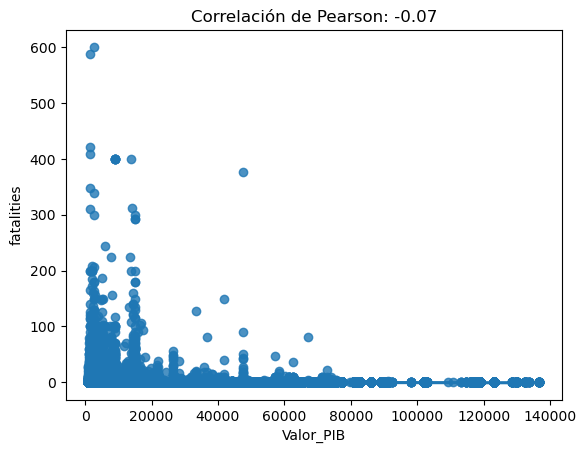

In [86]:
sns.regplot(correl_no_btl,
                x='Valor_PIB',
                y='fatalities',
                )

plt.title(f"Correlación de Pearson: {x:.2f}")

In [87]:
pib_largo

,Country Name,iso3,year,Valor_PIB
0,Afghanistan,AFG,2015,2967.692067
1,Albania,ALB,2015,13203.796947
2,Algeria,DZA,2015,15239.517146
3,American Samoa,ASM,2015,NaN
4,Andorra,AND,2015,62105.154239
...,...,...,...,...
2655,Sub-Saharan Africa,SSF,2024,4872.635614
2656,Sub-Saharan Africa (excluding high income),SSA,2024,5094.613125
2657,Sub-Saharan Africa (IDA & IBRD countries),TSS,2024,4872.635614
2658,Upper middle income,UMC,2024,21731.496873


In [88]:
pob = pd.read_csv('POB.csv', skipfooter=5)

C:\Users\acaro\AppData\Local\Temp\ipykernel_21704\1400510294.py:1: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.



In [89]:
pob = pob.rename(columns={
    'Population, total [SP.POP.TOTL]': 'population', 
    'Country Code': 'iso3'})

In [90]:
pob.columns.str.lower()

Index(['time', 'time code', 'country name', 'iso3', 'population'], dtype='object')

In [91]:
pob['year'] = pob['Time Code'].str.extract(r'(\d{4})').astype(int)

In [92]:
pob

,Time,Time Code,Country Name,iso3,population,year
0,2015,YR2015,Afghanistan,AFG,33831764,2015
1,2015,YR2015,Albania,ALB,2731293,2015
2,2015,YR2015,Algeria,DZA,40019529,2015
3,2015,YR2015,American Samoa,ASM,52878,2015
4,2015,YR2015,Andorra,AND,72174,2015
...,...,...,...,...,...,...
2655,2024,YR2024,Sub-Saharan Africa,SSF,1291044964,2024
2656,2024,YR2024,Sub-Saharan Africa (excluding high income),SSA,1158863843,2024
2657,2024,YR2024,Sub-Saharan Africa (IDA & IBRD countries),TSS,1291044964,2024
2658,2024,YR2024,Upper middle income,UMC,2817912698,2024


In [93]:
pob_largo = pob.iloc[:,2:6]


In [94]:
pob_largo

,Country Name,iso3,population,year
0,Afghanistan,AFG,33831764,2015
1,Albania,ALB,2731293,2015
2,Algeria,DZA,40019529,2015
3,American Samoa,ASM,52878,2015
4,Andorra,AND,72174,2015
...,...,...,...,...
2655,Sub-Saharan Africa,SSF,1291044964,2024
2656,Sub-Saharan Africa (excluding high income),SSA,1158863843,2024
2657,Sub-Saharan Africa (IDA & IBRD countries),TSS,1291044964,2024
2658,Upper middle income,UMC,2817912698,2024


In [95]:
df_corr_1 = correl_no_btl.merge(
    pob_largo[['iso3', 'year', 'population']],
    on=['iso3', 'year'],
    how='left'
)

In [96]:
df_corr_1

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,civilian_targeting,iso,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,population_1km,iso3,gini_avg,gdp_pc_10y_avg,Country Name,Valor_PIB,population
0,ZAM871,2015-01-01,2015,3,Political violence,Violence against civilians,Attack,UPND: United Party for National Development,NaN,Political militia,Civilians (Zambia),PF: Patriotic Front,Civilians,Political militia-Civilians,Civilian targeting,894,Southern Africa,Zambia,Northern,Kasama,NaN,Kasama,-10.2166,31.2167,1,Zambia Reports,National,UPND member Geoffrey Bwalya Mwamba and his sup...,0,NaN,1552577394,4194.0,ZMB,NaN,3588.743430,Zambia,3576.925448,16399089
1,GAM102,2015-01-01,2015,1,Strategic developments,Strategic developments,Arrests,Police Forces of Gambia (1996-2017),NaN,State forces,Civilians (Gambia),NaN,Civilians,State forces-Civilians,NaN,270,Western Africa,Gambia,Banjul,Banjul Central,NaN,Banjul,13.4531,-16.5775,1,AFP,International,Arrests: Dozens of military personnel and civi...,0,NaN,1618530319,30520.0,GMB,42.780000,2727.443776,"Gambia, The",2495.957416,2224529
2,VNM369,2015-01-01,2015,1,Demonstrations,Protests,Protest with intervention,Protesters (Vietnam),NaN,Protesters,Police Forces of Vietnam (1976-),NaN,State forces,State forces-Protesters,NaN,704,Southeast Asia,Vietnam,Ho Chi Minh,Tan Binh,NaN,Ho Chi Minh,10.8230,106.6300,1,US State Department,Other,People from Tien Giang Province tried to stage...,0,NaN,1618587205,56174.0,VNM,36.146154,11668.848168,Viet Nam,9248.023961,92823254
3,VNM368,2015-01-01,2015,1,Political violence,Violence against civilians,Attack,Police Forces of Vietnam (1976-),NaN,State forces,Civilians (Vietnam),Christian Group (Vietnam),Civilians,State forces-Civilians,Civilian targeting,704,Southeast Asia,Vietnam,Ho Chi Minh,Tan Binh,NaN,Ho Chi Minh,10.8230,106.6300,1,US State Department; Vietnamese American Commu...,Other,Police forces arrested and beat members of a M...,0,NaN,1618587205,56174.0,VNM,36.146154,11668.848168,Viet Nam,9248.023961,92823254
4,GAM103,2015-01-01,2015,1,Political violence,Violence against civilians,Abduction/forced disappearance,Military Forces of Gambia (1996-2017) National...,NaN,State forces,Civilians (Gambia),NaN,Civilians,State forces-Civilians,Civilian targeting,270,Western Africa,Gambia,Banjul,Banjul Central,NaN,Banjul,13.4531,-16.5775,1,HRW,Other,Five people reportedly abducted by men believe...,0,NaN,1618530319,30520.0,GMB,42.780000,2727.443776,"Gambia, The",2495.957416,2224529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1564155,CAO20709,2024-12-31,2024,1,Strategic developments,Strategic developments,Looting/property destruction,Ambazonian Separatists (Cameroon),NaN,Rebel group,Civilians (Cameroon),NaN,Civilians,Rebel group-Civilians,NaN,120,Middle Africa,Cameroon,Nord-Ouest,Mezam,Tubah,Bamessing,5.9785,10.3615,1,Local Network,Other,"Looting: On 31 December 2024, Ambazonian Separ...",0,NaN,1765923135,NaN,CMR,43.620000,4819.048308,Cameroon,4916.933540,29123744
1564156,CAO20710,2024-12-31,2024,1,Strategic developments,Strategic developments,Other,Ambazonian Separatists (Cameroon),NaN,Rebel group,NaN,NaN,NaN,Rebel group only,NaN,120,Middle Africa,Cameroon,Nord-Ouest,Mezam,Bamenda 3,Bamenda - Nkwen,5.9951,10.1937,2,Local Network,Other,"Other: On 31 December 2024, Ambazonian Separat...",0,NaN,1768269667,13273.0,CMR,43.620000,4819.048308,Cameroon,4916.933540,29123744
1564157,CAO20711,2024-12-31,2024,1,Political violence,Violence against civilians,Attack,Ambazonian Separatists (Cameroon),NaN,Rebel group,Civilians (Cameroon),NaN,Civilians,Rebel group-Civilians,Civilian targeting,120,Middle Africa,Cameroon,Nord-Ouest,Momo,Batibo,Angie,5.8019,9.8445,1,Local Network,Other,"On 31 Dec

In [97]:
df_corr_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564160 entries, 0 to 1564159
Data columns (total 38 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   event_id_cnty       1564160 non-null  object 
 1   event_date          1564160 non-null  object 
 2   year                1564160 non-null  int64  
 3   time_precision      1564160 non-null  int64  
 4   disorder_type       1564160 non-null  object 
 5   event_type          1564160 non-null  object 
 6   sub_event_type      1564160 non-null  object 
 7   actor1              1564160 non-null  object 
 8   assoc_actor_1       805221 non-null   object 
 9   inter1              1564160 non-null  object 
 10  actor2              576489 non-null   object 
 11  assoc_actor_2       216977 non-null   object 
 12  inter2              576489 non-null   object 
 13  interaction         1564160 non-null  object 
 14  civilian_targeting  309461 non-null   object 
 15  iso            

## Fatalities per capita relacionado con PIB? 

In [98]:
df_corr_1['population'] = pd.to_numeric(df_corr_1['population'], errors='coerce')

In [212]:
df_corr_1['fatalities'].value_counts()

fatalities
1      136153
2       28678
3       12764
4        5473
5        3455
        ...  
54          1
348         1
270         1
95          1
115         1
Name: count, Length: 150, dtype: int64

In [205]:
df_corr_1['fat_per_cap'] = df_corr_1['fatalities'] / df_corr_1['population']

In [206]:
df_corr_1['has_fatalities'] = df_corr_1['fatalities'] > 0

In [211]:
df_corr_1['has_fatalities'].value_counts()

has_fatalities
True    197729
Name: count, dtype: int64

<Axes: xlabel='Valor_PIB', ylabel='fat_per_cap'>

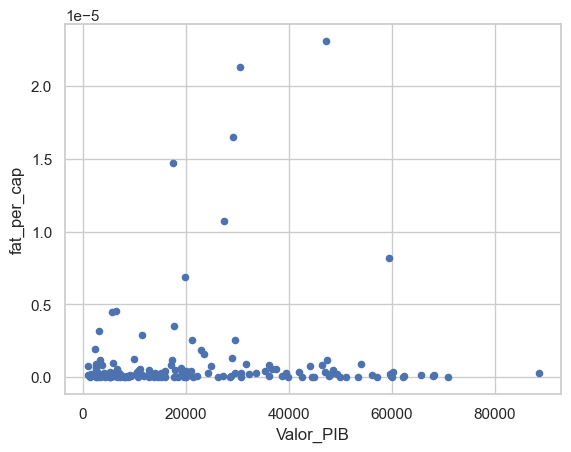

In [216]:
df_corr_1.groupby("country")[["Valor_PIB","fat_per_cap"]].mean().plot.scatter(x='Valor_PIB', y='fat_per_cap')

In [207]:
df_corr_1 = df_corr_1.loc[df_corr_1['has_fatalities'] == True]

In [208]:
corr_2 = df_corr_1['fat_per_cap'].corr(df_corr_1['Valor_PIB'])

corr_2

-0.03022349690257728

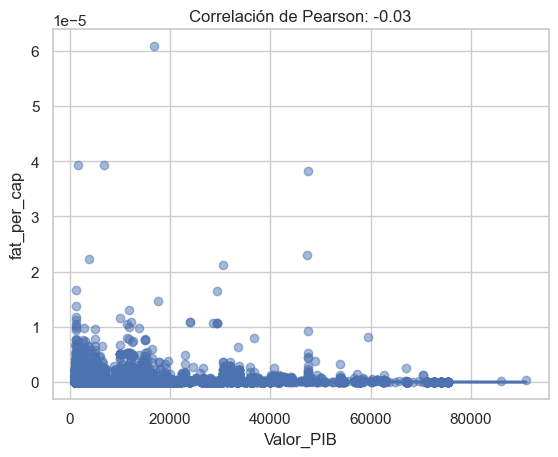

In [209]:
sns.regplot(
    data=df_corr_1,
    x='Valor_PIB',
    y='fat_per_cap',
    scatter_kws={'alpha':0.5}
)

plt.title(f"Correlación de Pearson: {corr_2:.2f}")

plt.savefig("fat_per_pib.png", dpi=300, bbox_inches='tight')

plt.show()

El gráfico muestra la relación entre fatalidades per cápita por evento y el PIB del país en el año del evento. Este enfoque es adecuado para estudiar la violencia “no‑guerra”, ya que estos eventos suelen ser muy frecuentes, heterogéneos y con un número de fatalidades generalmente bajo o igual a cero.
Analizar los datos a nivel de evento permite captar la micro‑dinámica de la violencia política y observar cómo varía su impacto relativo según el contexto económico. Cada punto del gráfico representa un evento individual, ponderado por la población del país, situado dentro de su nivel de desarrollo económico.
El patrón que emerge es típico:
- en países con PIB más bajo se observa una mayor dispersión y presencia de eventos relativamente más letales;
- en países con PIB más alto, los eventos tienden a ser menos letales y se concentran cerca de cero.
Esto sugiere que la severidad relativa de los eventos no‑guerra disminuye a medida que aumenta el nivel económico, mientras que en contextos más pobres existe mayor variabilidad y mayor probabilidad de eventos con impacto relativo más alto.


---

## Fatalities per capita relacionado con GINI?

In [102]:
df_corr_2 = df_corr_1.copy()

In [103]:
df_corr_2['has_fatalities'] = df_corr_2['fatalities'] > 0

In [104]:
df_protests = df_corr_2[df_corr_2['event_type'] == 'Protests']  
df_riots = df_corr_2[df_corr_2['event_type'] == 'Riots']

In [105]:
df_protests['sub_event_type'].unique()

array(['Protest with intervention', 'Peaceful protest',
       'Excessive force against protesters'], dtype=object)

In [106]:
df_riots['sub_event_type'].unique()

array(['Mob violence', 'Violent demonstration'], dtype=object)

<Axes: xlabel='gini_avg', ylabel='fat_per_cap'>

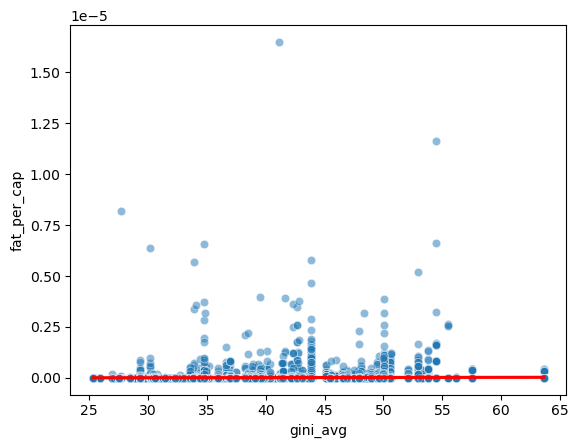

In [107]:
sns.scatterplot(
    data=df_riots,
    x='gini_avg',
    y='fat_per_cap',
    alpha=0.5
)

sns.regplot(
    data=df_riots,
    x='gini_avg',
    y='fat_per_cap',
    scatter=False,
    line_kws={'color': 'red'}
)

### Agrupando por pais y año y contando los disturbios? Que tipo de relacion hay? 

In [108]:
df_riots_agg = df_riots.groupby(['country', 'year']).agg(
    total_fatalities=('fatalities', 'sum'),
    total_riots=('event_type', 'count'),
    has_fatalities=('has_fatalities', 'max'),
    gini_avg=('gini_avg', 'first')

).reset_index()

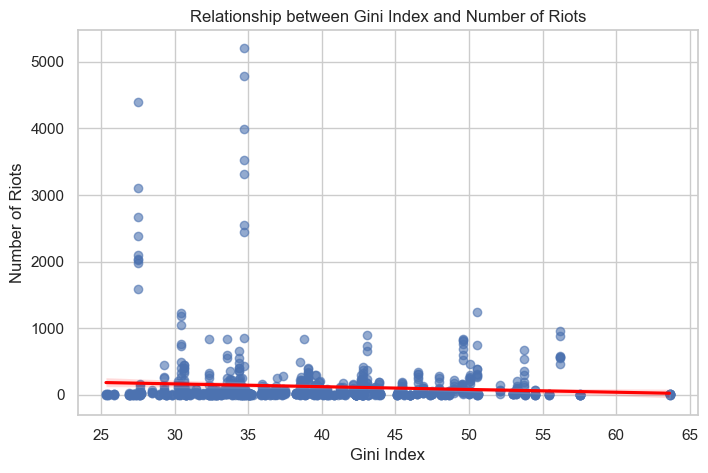

In [127]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8,5))
sns.regplot(
    data=df_riots_agg,
    x='gini_avg',
    y='total_riots',
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'}
)

plt.title('Relationship between Gini Index and Number of Riots')
plt.xlabel('Gini Index')
plt.ylabel('Number of Riots')
plt.savefig("riots_per_gini.png", dpi=300, bbox_inches='tight')
plt.show()

- No hay relación lineal clara entre el índice de Gini y el número de disturbios.
- La línea de regresión casi horizontal indica que la desigualdad no predice cuántos disturbios ocurren.
- Los puntos están muy dispersos, lo que muestra que países con desigualdad alta pueden tener pocos disturbios y viceversa.
- Esto sugiere que otros factores (políticos, institucionales, históricos) influyen mucho más en la frecuencia de las protestas que la desigualdad económica.


In [110]:
df_protests_agg = df_protests.groupby(['country', 'year']).agg(
    total_fatalities=('fatalities', 'sum'),
    total_protests=('event_type', 'count'),
    has_fatalities=('has_fatalities', 'max'),
    gini_avg=('gini_avg', 'first')

).reset_index()

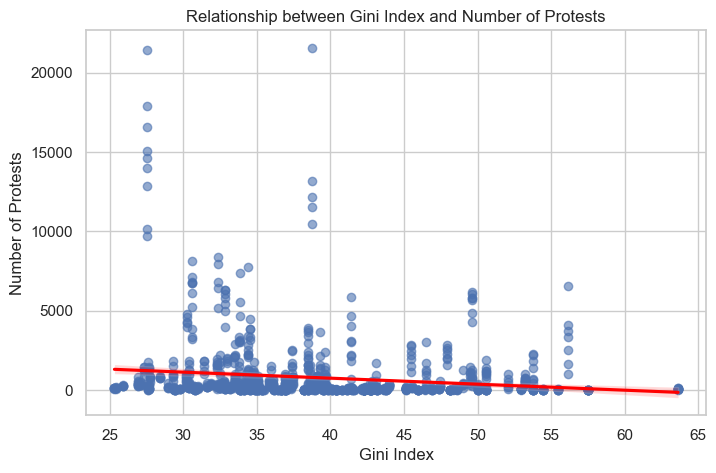

In [126]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8,5))
sns.regplot(
    data=df_protests_agg,
    x='gini_avg',
    y='total_protests',
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'}
)

plt.title('Relationship between Gini Index and Number of Protests')
plt.xlabel('Gini Index')
plt.ylabel('Number of Protests')

plt.savefig("protests_per_gini.png", dpi=300, bbox_inches='tight')
plt.show()